In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/irmac/Developer/Python/SI201/Projects/fall25-project1-Isaiahchonchoramirez/crop_yield.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
df.sample(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
43716,West,Loam,Wheat,440.365113,15.081251,True,False,Sunny,125,4.329793
588764,West,Loam,Cotton,337.431988,17.173760,False,True,Cloudy,77,3.577735
20848,North,Loam,Barley,279.159969,35.713918,True,False,Sunny,105,3.099982
508679,West,Clay,Cotton,748.830401,36.508695,False,False,Sunny,73,4.287264
983097,East,Sandy,Maize,281.461960,35.432765,False,False,Sunny,100,2.831504
91355,West,Silt,Wheat,593.050749,27.272010,False,False,Rainy,90,3.434576
626292,North,Loam,Barley,186.328349,34.417398,True,False,Sunny,122,2.655114
207921,East,Sandy,Wheat,275.351850,27.670896,False,True,Cloudy,106,3.397596
293309,South,Clay,Barley,898.728432,33.231812,True,False,Cloudy,76,5.430959
981454,West,Peaty,Wheat,523.185508,25.171584,True,False,Rainy,108,4.700526


In [6]:
df.shape


(1000000, 10)

In [7]:
df.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

# Calculate yield per unit of rainfall (tons per mm).

Region
East     0.009879
North    0.009865
South    0.009862
West     0.009859
Name: Yield_per_mm, dtype: float64


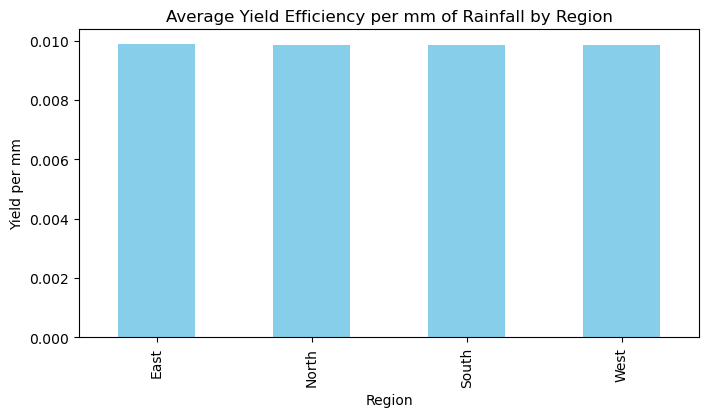

In [8]:
# Columns: Yield_tons_per_hectare, Rainfall_mm, Region
# Yield efficiency per rainfall unit by region
# Calculate yield per rainfall unit
df['Yield_per_mm'] = df['Yield_tons_per_hectare'] / df['Rainfall_mm']

# Group by region
region_yield_eff = df.groupby('Region')['Yield_per_mm'].mean().sort_values(ascending=False)
print(region_yield_eff)

# Plot
region_yield_eff.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.ylabel('Yield per mm')
plt.show()



# Regional rain map / average rain per region.

Weather_Condition  Cloudy   Rainy   Sunny
Region                                   
East               549.12  550.43  548.19
North              549.36  550.88  552.13
South              550.39  549.77  549.89
West               549.03  549.44  551.16


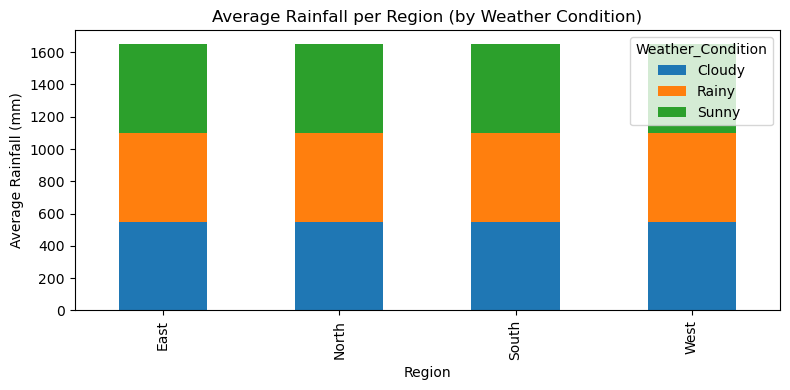

In [18]:
# Columns: Rainfall_mm, Region, Weather_Condition
# Which region gets the highest yield per mm of rainfall?
# Calculate average rainfall per region and weather condition
region_rain = (
    df.groupby(['Region', 'Weather_Condition'])['Rainfall_mm']
    .mean()
    .unstack()
    .fillna(0)
)

# Display table
print(region_rain.round(2))

# Plot
region_rain.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Average Rainfall per Region (by Weather Condition)')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


# Crop yeild per region / per soil type.


Crop         Barley    Cotton     Maize      Rice   Soybean     Wheat
Soil_Type                                                            
Chalky     4.649948  4.663595  4.653498  4.640907  4.657995  4.651330
Clay       4.651793  4.645118  4.630174  4.646297  4.651116  4.644797
Loam       4.643126  4.633848  4.666891  4.651742  4.639517  4.671253
Peaty      4.650058  4.647561  4.635270  4.657866  4.661625  4.654183
Sandy      4.658929  4.652088  4.632811  4.654259  4.656205  4.636889
Silt       4.630665  4.662891  4.629473  4.653537  4.655866  4.658146


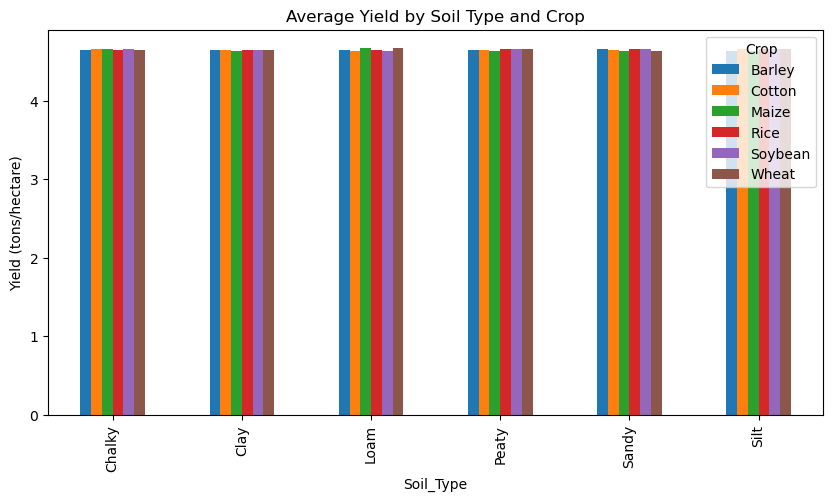

In [19]:
# Columns: Yield_tons_per_hectare, Soil_Type, Crop.
# How does soil type influence the yield for different crops?
soil_crop_yield = df.groupby(['Soil_Type', 'Crop'])['Yield_tons_per_hectare'].mean().unstack()
print(soil_crop_yield)

soil_crop_yield.plot(kind='bar', figsize=(10,5))
plt.title('Average Yield by Soil Type and Crop')
plt.ylabel('Yield (tons/hectare)')
plt.show()

 

# Harvest time vs yield with irrigation/fertilizer

                                 Days_to_Harvest  Yield_tons_per_hectare
Irrigation_Used Fertilizer_Used                                         
False           False                 104.530224                3.302678
                True                  104.523817                4.799632
True            False                 104.513180                4.499366
                True                  104.412878                5.999009


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


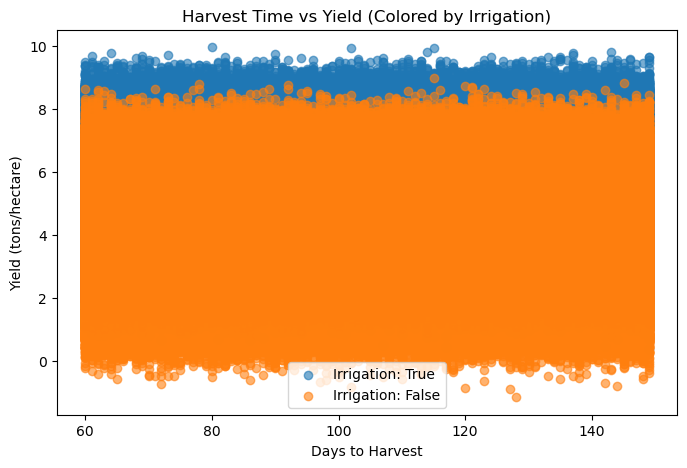

In [20]:
# Columns: Days_to_Harvest, Yield_tons_per_hectare, Irrigation_Used, Fertilizer_Used
# Do irrigation and fertilizer reduce time-to-harvest or increase yield?
# Average yield and harvest time based on irrigation/fertilizer
harvest_analysis = df.groupby(['Irrigation_Used', 'Fertilizer_Used'])[['Days_to_Harvest', 'Yield_tons_per_hectare']].mean()
print(harvest_analysis)

# Scatter plot
plt.figure(figsize=(8,5))
for irr in df['Irrigation_Used'].unique():
    subset = df[df['Irrigation_Used'] == irr]
    plt.scatter(subset['Days_to_Harvest'], subset['Yield_tons_per_hectare'], label=f'Irrigation: {irr}', alpha=0.6)
plt.legend()
plt.title('Harvest Time vs Yield (Colored by Irrigation)')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons/hectare)')
plt.show()



# Weather condition yield analysis.

Region                 East     North     South      West
Weather_Condition                                        
Cloudy             4.645841  4.644574  4.650179  4.648250
Rainy              4.649561  4.655289  4.645107  4.647133
Sunny              4.641403  4.662442  4.651227  4.652624


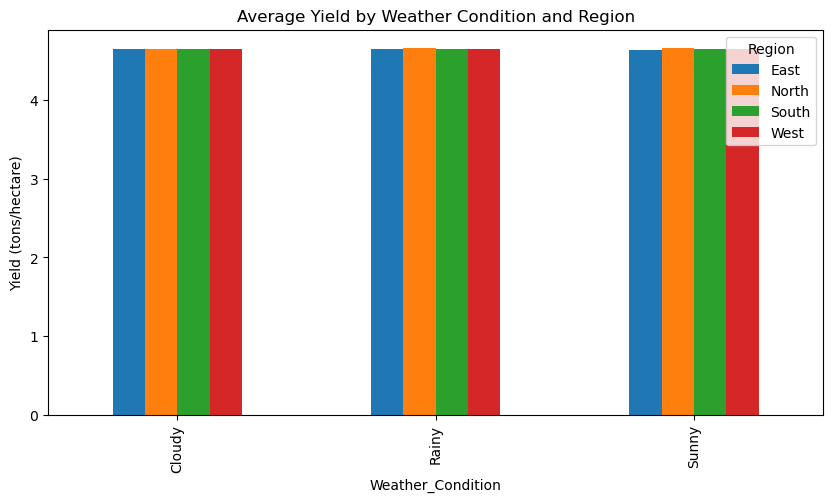

In [21]:
# Columns: Yield_tons_per_hectare, Weather_Condition, Region
# Which weather condition is associated with the highest yields across regions?
weather_yield = df.groupby(['Weather_Condition', 'Region'])['Yield_tons_per_hectare'].mean().unstack()
print(weather_yield)

weather_yield.plot(kind='bar', figsize=(10,5))
plt.title('Average Yield by Weather Condition and Region')
plt.ylabel('Yield (tons/hectare)')
plt.show()



# Try and calculate z-score of percipitation vs soil, make a table.

Weather_Condition  Cloudy  Rainy  Sunny
Soil_Type                              
Chalky             -0.002  0.008  0.006
Clay               -0.000 -0.008  0.000
Loam                0.000  0.000 -0.004
Peaty              -0.002  0.002  0.003
Sandy              -0.005 -0.001  0.002
Silt               -0.003  0.003  0.001


<Figure size 800x400 with 0 Axes>

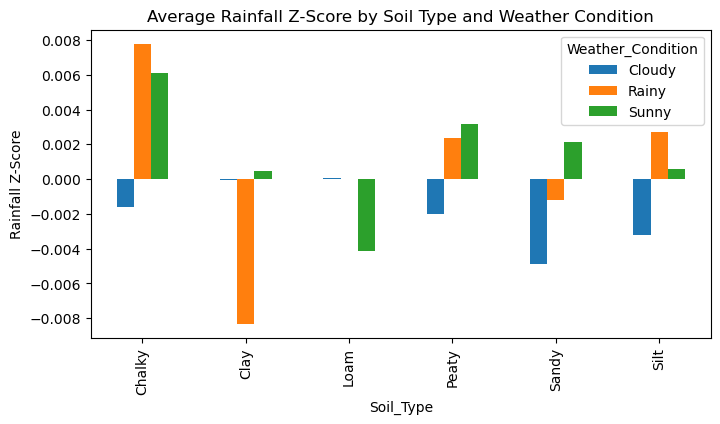

In [14]:
# Columns Soil_type, Rainfall_mm, and weather condition.
## Compute z-score for rainfall
df['Rainfall_zscore'] = (df['Rainfall_mm'] - df['Rainfall_mm'].mean()) / df['Rainfall_mm'].std()

rain_z = df.groupby(['Soil_Type', 'Weather_Condition'])['Rainfall_zscore'].mean().unstack()
print(rain_z.round(3))

plt.figure(figsize=(8,4))
rain_z.plot(kind='bar', figsize=(8,4))
plt.title('Average Rainfall Z-Score by Soil Type and Weather Condition')
plt.ylabel('Rainfall Z-Score')
plt.show()


In [15]:
print("Top region by yield per mm of rain:", region_yield_eff.idxmax())
print("Region with highest average rainfall:", region_rain.mean(axis=1).idxmax())
print("Weather condition with best yields:", weather_yield.mean(axis=1).idxmax())


Top region by yield per mm of rain: East


NameError: name 'region_rain' is not defined